Import packages

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import back
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

Open File

In [2]:
emb = pd.read_csv('C:/Users/thoma/SHARE/Firstsample/emb2.csv')
#print(emb.head(5))

Cleaning / birth date transformation

In [3]:
# remove naissance outliers

# Calcul de Q1, Q3 et IQR
Q1 = emb['naissance'].quantile(0.25)
Q3 = emb['naissance'].quantile(0.75)
IQR = Q3 - Q1

# Defining terminals for filtering outliers
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Outlier filtering
emb_filtré = emb[(emb['naissance'] >= borne_inf) & (emb['naissance'] <= borne_sup)]
emb_filtré = emb_filtré [(emb_filtré['cancer']) >= 0]

# Transformation of birth variabe to age and deletion of "birth"
emb_filtré['age'] = 2004 - emb_filtré['naissance']
emb_filtré = emb_filtré [emb_filtré['age'] > 50]
emb_filtré = emb_filtré.drop("naissance", axis = 1)

# Remove column Unnamed
# Remove the column at index 1
emb_filtré.drop(emb_filtré.columns[0], axis=1, inplace=True)


Visualisation

<Axes: >

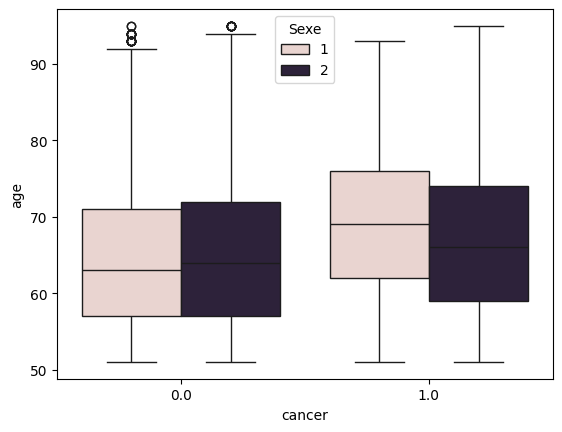

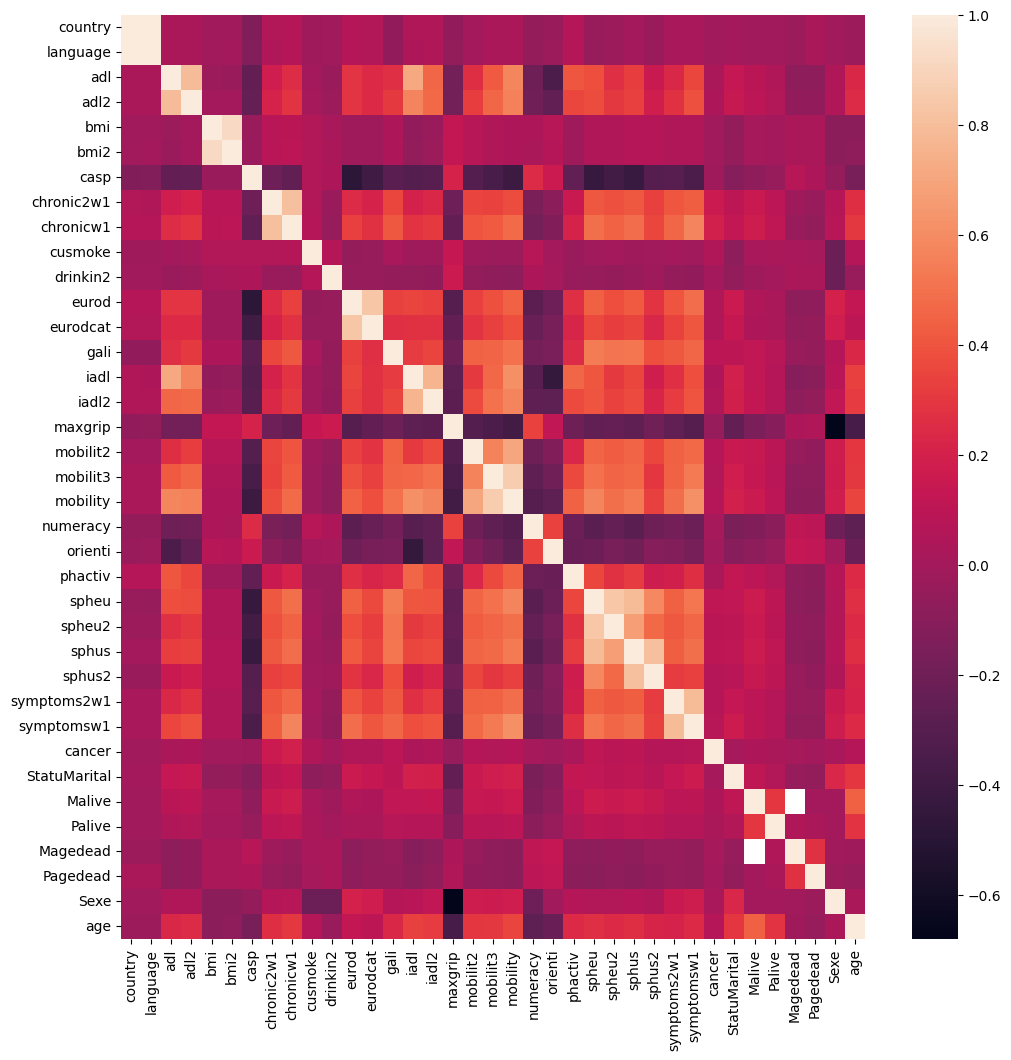

In [4]:
# Boxplot test age/genre/cancer
sns.boxplot(x="cancer", y="age", hue="Sexe", data=emb_filtré)

# Identify numerical variables
col_num = emb_filtré.select_dtypes(include=[np.number]).columns
df_numerique = emb_filtré[col_num]

# heatmap sur sdf df-numérique 
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_numerique.corr(), ax=ax)

Machine learning methodology

In [5]:
#Sub data frame creation
rdf = emb_filtré[["country", "casp", "cusmoke", "drinkin2", "eurod", "eurodcat", "maxgrip", "orienti", "cancer", "StatuMarital", "Malive", "Palive", "Magedead", "Pagedead", "Sexe", "age"]]


# Remove NA
# Rows
print("ROWS")
back.remaining_rows(rdf)
print("")
# Columns
print("Columns")
back.remaining_column(rdf)
print("")


### A lot of data is lost. In addition, 68.75 % of columns have been deleted. We therefore need to find a solution for imputing the missing values.
### We need to explore where the NA are

# eurodcat
print("eurodcat")
rdf, output_messages = back.explore_NA("eurodcat", rdf)
print(output_messages)
print("")

# cusmoke
print("cusmoke")
rdf, output_messages = back.explore_NA("cusmoke", rdf)
print(output_messages)
print("")










# # Calcul of the cancer frequency
# frequency = rm_row_columns['cancer'].value_counts()
# n = frequency[0]
# nbcancer = frequency[1]
# ratio_cancer = nbcancer/n*100
# print(" Cancer frequency = " + str(ratio_cancer) + " %")




ROWS
Number of dataset rows : 28088
Number of remaining rows : 11775
Number of removed rows :  16313
58.08 % lost

Columns
Number of dataset columns : 16
Number of remaining columns : 5
Number of removed columns :  11
68.75 % lost

eurodcat
2.28 % of NA in eurodcat
modalities: [ 0.  1. nan]
frequency_table: eurodcat
0.0    20437
1.0     7010
Name: count, dtype: int64
type : <class 'str'>
['Number of remaining NAs: 0']

cusmoke
0.04 % of NA in cusmoke
modalities: [ 2.  5.  1. -1. nan -2.]
frequency_table: cusmoke
 2.0    14892
 5.0     7969
 1.0     5211
-1.0        3
-2.0        1
Name: count, dtype: int64
type : <class 'str'>
["Unrecognized answer. Please respond with 'y' or 'n'."]



In [ ]:
#classification model
model = KNeighborsClassifier()
y = test["cancer"]
X = test.drop("cancer", axis = 1)

model.fit(X, y)
model_result = model.score(X, y)
model_result = model_result *100

print("model_result = " + str(model_result) + " %")

# Difference between both
diff = 100 - (model_result + ratio_cancer)
print("Difference = " + str(diff) + " pts")